In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# How to Get Your Name in Shinnnnnnnnnnnnnnnnnnnning Lights

## Summary of what we are looking at 
- how we define success. 
- In most cells, give a breif descrition of what we are doing and were files come from.
- have one cell that is markdown, then code cell
- combine cells
- describe visualization. What is the take away, what is the message.
- will have to make some judgement calls on what we could leave out.
- dont need to explain code for vidualization, just what the visualization says.

## Alexis' work

In [2]:
streaming = pd.read_csv('MoviesOnStreamingPlatforms_updated.csv').set_index('ID').drop('Unnamed: 0', axis = 1)
imdb = pd.read_csv('imdb.csv')
imdb['date_published'] = pd.to_datetime(imdb['date_published'], errors = 'coerce')

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
imdb_subset = imdb[['title','original_title','date_published','avg_vote','budget','usa_gross_income','worlwide_gross_income']]
streaming_subset = streaming[['Title','Genres','Age','Runtime','Country']]
streaming_subset['Streaming'] = streaming[['Netflix','Hulu','Prime Video','Disney+']].apply(sum,axis = 1)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [4]:
joined = pd.merge(streaming_subset,imdb_subset, how = 'inner',right_on = 'original_title',left_on = 'Title')

In [5]:
display(joined.head(5))
len(joined) #7345 when using title, 10149 when using original title, started with 16744
joined['Age'].unique()
age_rating = pd.CategoricalDtype(['all','7+','13+','16+','18+','nan'])
joined.groupby('Age').agg([np.nanmean,np.std])

,Title,Genres,Age,Runtime,Country,Streaming,title,original_title,date_published,avg_vote,budget,usa_gross_income,worlwide_gross_income
0,Inception,"Action,Adventure,Sci-Fi,Thriller",13+,148.0,"United States,United Kingdom",1,Inception,Inception,2010-09-24,8.8,$ 160000000,$ 292576195,$ 869784991
1,The Matrix,"Action,Sci-Fi",18+,136.0,United States,1,Matrix,The Matrix,1999-05-07,8.7,$ 63000000,$ 171479930,$ 465718588
2,Avengers: Infinity War,"Action,Adventure,Sci-Fi",13+,149.0,United States,1,Avengers: Infinity War,Avengers: Infinity War,2018-04-25,8.4,$ 321000000,$ 678815482,$ 2048359754
3,Back to the Future,"Adventure,Comedy,Sci-Fi",7+,116.0,United States,1,Ritorno al futuro,Back to the Future,1985-10-18,8.5,$ 19000000,$ 211406762,$ 388774684
4,Spider-Man: Into the Spider-Verse,"Animation,Action,Adventure,Family,Sci-Fi",7+,117.0,United States,1,Spider-Man: Un nuovo universo,Spider-Man: Into the Spider-Verse,2018-12-25,8.4,$ 90000000,$ 190241310,$ 375540831


Runtime            Streaming            avg_vote          
        nanmean        std   nanmean       std   nanmean       std
Age                                                               
13+  107.580184  24.848713  1.136778  0.363852  5.958764  1.203524
16+   97.549020  18.016418  1.090909  0.288418  5.203896  1.271605
18+   99.182398  18.656451  1.080360  0.283898  5.535345  1.243879
7+   104.623377  23.761924  1.073852  0.261661  5.894810  1.197881
all  103.783908  62.613762  1.054422  0.227106  6.093424  1.205509

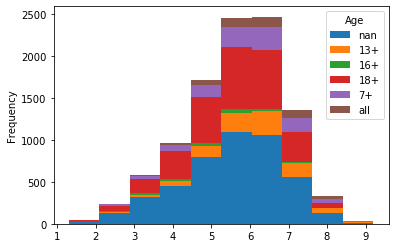

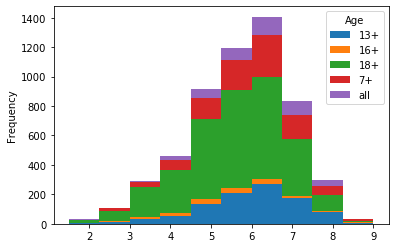

In [6]:
joined.pivot(columns = 'Age')['avg_vote'].plot(kind = 'hist', stacked=True)
joined.dropna(subset = ['Age']).pivot(columns = 'Age')['avg_vote'].plot(kind = 'hist', stacked=True)

These plots are showing us the distributions of ratings. The color shows us different age groups. Not sure if this is the best visualization for this.

Gives us an idea of the variation among age groups. It doesn't look like there is much.

Also you can look at the cell above and see that shown as well.

In [7]:
genres = []
vals=[]
errors = []

for x in joined['Genres'].unique():
    gs = str(x).split(',')
    for gen in gs:
        if gen in genres:
            continue
        else:
            genres.append(gen)

for g in genres:
    movies = joined[joined['Genres'].map(lambda x: g in str(x))]
    vals.append(np.nanmean(movies['avg_vote']))
    errors.append(np.std(movies['avg_vote']))

<ErrorbarContainer object of 3 artists>

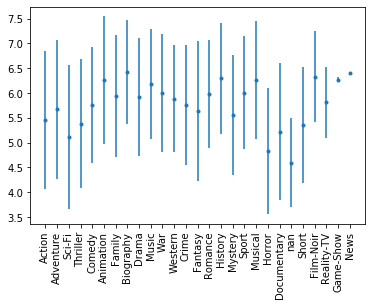

In [8]:
plt.xticks(rotation = 90)
plt.errorbar(genres, vals, errors,fmt = '.')

The mean vote (error bars are one std). This shows that even through they all have differnt means, they are all within one std. 

Text(0.5, 0, 'Runtime')

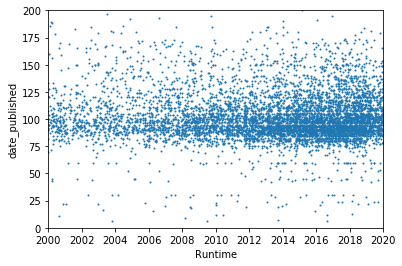

In [9]:
fig,ax = plt.subplots()
small = joined#.sample(500)
ax.scatter(small['date_published'],small['Runtime'], s=1)
ax.set_ylim(0,200)
ax.set_xlim('2000','2020')
# ax.set_xscale('symlog')
ax.set_ylabel('date_published')
ax.set_xlabel('Runtime')

Do what you want with this plot. It is queried based on time, but I am not sure it shows anything useful.

In [10]:
doll = joined[joined['budget'].map(lambda x: '$' in str(x))]

doll['worlwide_gross_income'] = doll['worlwide_gross_income'].map(lambda x : float(str(x).replace('$','')))
doll['usa_gross_income'] = doll['usa_gross_income'].map(lambda x : float(str(x).replace('$','')))

doll.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Title,Genres,Age,Runtime,Country,Streaming,title,original_title,date_published,avg_vote,budget,usa_gross_income,worlwide_gross_income
0,Inception,"Action,Adventure,Sci-Fi,Thriller",13+,148.0,"United States,United Kingdom",1,Inception,Inception,2010-09-24,8.8,$ 160000000,292576195.0,8.697850e+08
1,The Matrix,"Action,Sci-Fi",18+,136.0,United States,1,Matrix,The Matrix,1999-05-07,8.7,$ 63000000,171479930.0,4.657186e+08
2,Avengers: Infinity War,"Action,Adventure,Sci-Fi",13+,149.0,United States,1,Avengers: Infinity War,Avengers: Infinity War,2018-04-25,8.4,$ 321000000,678815482.0,2.048360e+09
3,Back to the Future,"Adventure,Comedy,Sci-Fi",7+,116.0,United States,1,Ritorno al futuro,Back to the Future,1985-10-18,8.5,$ 19000000,211406762.0,3.887747e+08
4,Spider-Man: Into the Spider-Verse,"Animation,Action,Adventure,Family,Sci-Fi",7+,117.0,United States,1,Spider-Man: Un nuovo universo,Spider-Man: Into the Spider-Verse,2018-12-25,8.4,$ 90000000,190241310.0,3.755408e+08


Text(0.5, 0, 'US income ($)')

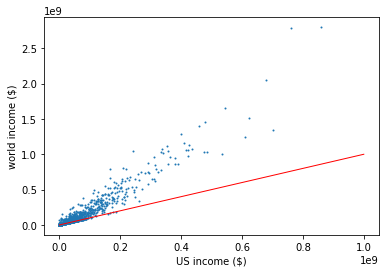

In [11]:
fig1,ax1 = plt.subplots()
ax1.scatter(doll['usa_gross_income'],doll['worlwide_gross_income'], s=1)
ax1.plot([0,1e9],[0,1e9], 'r', linewidth=1)
# ax.set_xlim('2000','2020')
# ax1.set_yscale('symlog')
# ax1.set_xscale('symlog')
ax1.set_ylabel('world income ($)')
ax1.set_xlabel('US income ($)')

What does this show?

In [12]:
doll['budget'] = doll['budget'].map(lambda x : float(str(x).replace('$','')))

doll[doll['budget']<1000000].head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Title,Genres,Age,Runtime,Country,Streaming,title,original_title,date_published,avg_vote,budget,usa_gross_income,worlwide_gross_income
69,The Evil Dead,Horror,18+,85.0,United States,1,La casa,The Evil Dead,1984-08-17,7.5,350000.0,2400000.0,2893091.0
115,Chasing Amy,"Comedy,Drama,Romance",18+,113.0,United States,1,In cerca di Amy,Chasing Amy,1997-04-18,7.2,250000.0,12021272.0,12021272.0
117,The Wicker Man,"Horror,Mystery,Thriller",18+,88.0,United Kingdom,1,The Wicker Man,The Wicker Man,1973-12-06,7.5,810000.0,60891.0,98201.0
133,Blue Ruin,"Crime,Drama,Thriller",18+,90.0,"United States,France",1,Blue Ruin,Blue Ruin,2014-07-09,7.1,420000.0,258384.0,993313.0
164,Freaks,"Drama,Mystery,Sci-Fi,Thriller",18+,105.0,"Canada,United States",1,Freaks,Freaks,1932-02-20,7.9,310607.0,NaN,4072.0


Text(0.5, 0, 'vote')

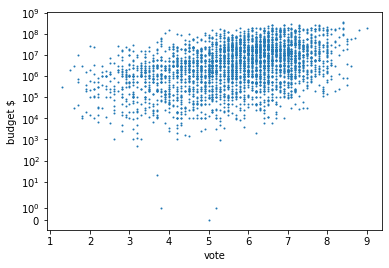

In [13]:
fig1,ax1 = plt.subplots()
ax1.scatter(doll['avg_vote'],doll['budget'], s=1)
# ax.set_xlim('2000','2020')
ax1.set_yscale('symlog')
ax1.set_ylabel('budget $')
ax1.set_xlabel('vote')

In [14]:
platforms = ['Netflix','Hulu','Prime Video','Disney+']

platvals=[]
platerrors = []

for plat in platforms:
    movies = streaming[streaming[plat]==1]
    platvals.append(np.nanmean(movies['IMDb']))
    platerrors.append(np.std(movies['IMDb']))

<ErrorbarContainer object of 3 artists>

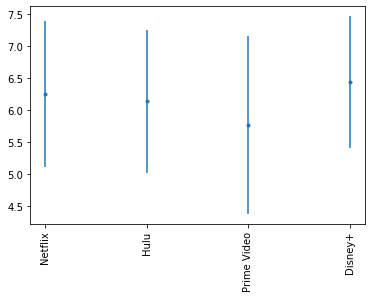

In [15]:
plt.xticks(rotation = 90)
plt.errorbar(platforms, platvals, platerrors,fmt = '.')

Text(0.5, 0, 'vote')

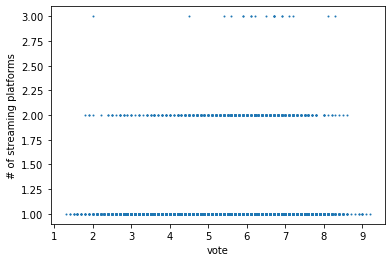

In [16]:
fig2,ax2 = plt.subplots()
ax2.scatter(joined['avg_vote'],joined['Streaming'], s=1)
ax2.set_ylabel('# of streaming platforms')
ax2.set_xlabel('vote')

In [17]:
joined.groupby('Streaming').agg([np.nanmean, np.std])['avg_vote']

,nanmean,std
Streaming,,
1,5.609963,1.284162
2,5.825072,1.212479
3,6.275000,1.328186


## Ben's work

In [19]:
streaming = pd.read_csv('MoviesOnStreamingPlatforms_updated.csv').set_index('ID').drop('Unnamed: 0', axis = 1)

In [21]:
oscars = pd.read_csv('oscars.csv')

In [22]:
def winner_nominated(x):
    if x != 1:
        return 0
    else:
        return x
oscars['Winner'] = oscars['Winner'].apply(winner_nominated)
oscars['Winner'].head(3)

0    0.0
1    1.0
2    0.0
Name: Winner, dtype: float64

## Do better rated movies win more awardsscatterplot compairing imdb ratings and rotton tomatoes

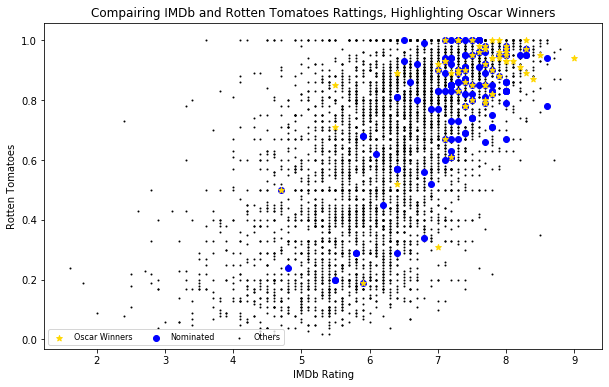

In [23]:
df = streaming[['Title', 'IMDb', 'Rotten Tomatoes', 'Year']].merge(oscars[['Winner','Film']], left_on='Title', right_on='Film', how='left')

def percent_to_float(x):
    try:
        x = x.strip('%')
        return float(x)/100
    except:
        return np.nan
df['Rotten Tomatoes'] = df['Rotten Tomatoes'].apply(percent_to_float)

winners = df[df['Winner']==1]
nominated = df[df['Winner']==0]
other = df[np.isnan(df['Winner'])]

fig, ax = plt.subplots(figsize=(10, 6))
other = plt.scatter(other['IMDb'], other['Rotten Tomatoes'], c='black',s=1)
nominated = plt.scatter(nominated['IMDb'], nominated['Rotten Tomatoes'], c='blue')
winners = plt.scatter(winners['IMDb'], winners['Rotten Tomatoes'], c='gold', marker='*')
plt.title('Compairing IMDb and Rotten Tomatoes Rattings, Highlighting Oscar Winners')
plt.xlabel("IMDb Rating")
plt.ylabel("Rotten Tomatoes")
plt.legend((winners, nominated, other), ('Oscar Winners', 'Nominated', 'Others'), scatterpoints=1, loc='lower left', ncol=3, fontsize=8)
plt.show()

It is nice to see that better rather movies do in general get rewarded with winning awards

### Is there a statistical difference in mean IMDb and Rotten Tomato scores between winners and non winners?


## How has the funding of movies increased over time?
scatter plot showing ratings over time

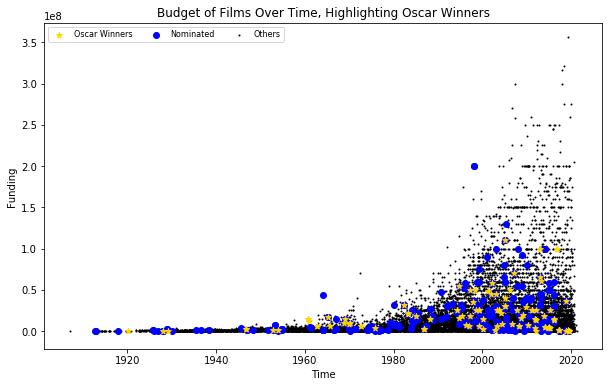

In [25]:
df2 = imdb[['title', 'budget', 'avg_vote', 'date_published']].merge(oscars[['Winner','Film']], left_on='title', right_on='Film', how='left')

def budget(x):
    try:
        x=x.strip('$ ')
        return int(x)
    except:
        return np.nan
df2['budget'] = df2['budget'].apply(budget)

winners2 = df2[df2['Winner']==1]
nominated2 = df2[df2['Winner']==0]
other2 = df2[np.isnan(df2['Winner'])]

fig, ax = plt.subplots(figsize=(10, 6))
other = plt.scatter(other2['date_published'], other2['budget'], c='black', s=1)
winners = plt.scatter(nominated2['date_published'], nominated2['budget'], c='blue')
winners = plt.scatter(winners2['date_published'], winners2['budget'], c='gold', marker='*')
plt.title('Budget of Films Over Time, Highlighting Oscar Winners')
plt.xlabel("Time")
plt.ylabel("Funding")
plt.legend((winners, nominated, other), ('Oscar Winners', 'Nominated', 'Others'), scatterpoints=1, loc='upper left', ncol=3, fontsize=8)
plt.show()

/opt/conda/lib/python3.7/site-packages/pandas/core/series.py:853: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


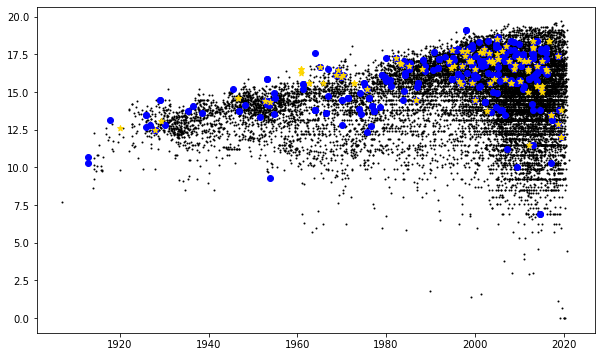

In [26]:
fig, ax = plt.subplots(figsize=(10, 6))
other = plt.scatter(other2['date_published'], np.log(other2['budget']), c='black', s=1)
winners = plt.scatter(nominated2['date_published'], np.log(nominated2['budget']), c='blue')
winners = plt.scatter(winners2['date_published'], np.log(winners2['budget']), c='gold', marker='*')
plt.show()

As expected, the budgets for movies has grown exponentially. But what is good to see is that for recent movies at lease, you cant really buy awards. Lot of nominations and winners are towards the bottom. However, if we look at the log numbers it doesnt actually look to matter? we will talk about this as a group.

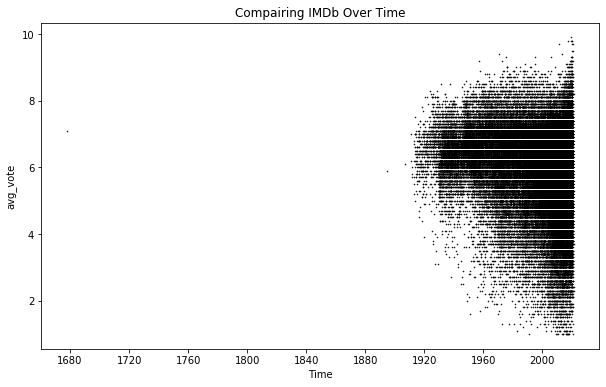

In [27]:
fig, ax = plt.subplots(figsize=(10, 6))
plt.scatter(imdb['date_published'], imdb['avg_vote'], c='black', s =.3)
plt.title('Compairing IMDb Over Time')
plt.xlabel("Time")
plt.ylabel("avg_vote")
plt.show()

So there is a little bit of a recency bias, but thats not suprising. What I was really checking for is if there was a difference in how newer and older mives were rated on IMDb. And, kinda like yeah. They are rated maube a little higher on average than newer movies. I expect this is becuase people only choose to watch, then rate, old movies that are already known to be good.

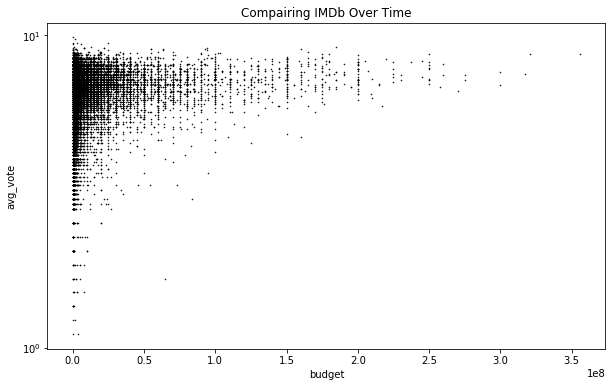

In [28]:
fig, ax = plt.subplots(figsize=(10, 6))
plt.scatter(df2['budget'], df2['avg_vote'], c='black', s =.3)
plt.title('Compairing IMDb Over Time')
ax.set_yscale('symlog')
plt.xlabel("budget")
plt.ylabel("avg_vote")
plt.show()

## Can User Ratings and Critic Ratings Predict Award Winners?

We were interested in exploring the relationship between user ratings and critic ratings and how these ratings compare for movies that have won awards or have been nominated vs. movies that have not won awards. Further, we wanted to compare ratings and winnings across time periods. The time periods we selected are the golden age of Hollywood (1920-1969), the rise of home video (1980-2000), and the last ten years (2010-2020).

In [14]:
m = pd.read_csv('imdb.csv')
m['date_published'] = pd.to_datetime(m['date_published'], errors = 'coerce')

# golden age of film df
m_golden = m[(m['date_published']>'1927-01-01')&(m['date_published']<'1969-12-31')]
m_golden = m_golden[['original_title', 'avg_vote', 'metascore']].rename(columns={'original_title':'title'})
m_golden.dropna().head()

,title,avg_vote,metascore
506,Metropolis,8.3,98.0
566,The Jazz Singer,6.5,66.0
628,The Circus,8.1,90.0
714,The Cocoanuts,7.0,69.0
786,Piccadilly,7.1,89.0


In [15]:
def nan_fix(df):
    if str(df) == 'nan':
        return 1
    if df == 1.0:
        return 2
    else:
        return 0

a = pd.read_csv('oscars.csv')
a = a[['Winner', 'Film']]
a['Winner'] = a['Winner'].apply(nan_fix)
a = a.rename(columns={"Film": "title"})

# golden age of film df merged with oscar data to create column displaying if a movie has been nominated/won
merge_golden = m_golden.merge(a, how='left', on = 'title')
merge_golden = merge_golden.dropna(subset=['metascore'])
merge_golden['Winner'] = merge_golden['Winner'].fillna(0)

merge_golden = merge_golden.groupby('title').agg(np.mean)
merge_golden.head()

,avg_vote,metascore,Winner
title,,,
12 Angry Men,8.9,96.0,0.0
13 Ghosts,6.1,56.0,0.0
"20,000 Leagues Under the Sea",7.2,83.0,0.0
2001: A Space Odyssey,8.3,84.0,0.0
42nd Street,7.4,83.0,0.0


In [16]:
# movies during the rise of home video df
m_home = m[(m['date_published']>'1980-01-01')&(m['date_published']<'2000-12-31')]
m_home = m_home[['original_title', 'avg_vote', 'metascore']].rename(columns={'original_title':'title'})
m_home.dropna().head()

,title,avg_vote,metascore
16013,El espíritu de la colmena,7.9,87.0
17454,Eraserhead,7.4,87.0
17546,The Killing of a Chinese Bookie,7.4,65.0
18048,The Kentucky Fried Movie,6.5,61.0
18488,I Wanna Hold Your Hand,6.9,64.0


In [17]:
# rise of home video merged with oscar data to create column displaying if a movie has been nominated/won
merge_home = m_home.merge(a, how='left', on = 'title')
merge_home = merge_home.dropna(subset=['metascore'])
merge_home['Winner'] = merge_home['Winner'].fillna(0)

merge_home = merge_home.groupby('title').agg(np.mean)
merge_home.head()

,avg_vote,metascore,Winner
title,,,
$pent,5.1,34.0,0.0
'Breaker' Morant,7.8,72.0,0.0
'Crocodile' Dundee,6.6,62.0,0.0
'Crocodile' Dundee II,5.6,41.0,0.0
*batteries not included,6.7,54.0,0.0


In [18]:
# movies from the last 10 years
m_now = m[(m['date_published']>'2010-01-01')&(m['date_published']<'2020-12-31')]
m_now = m_now[['original_title', 'avg_vote', 'metascore']].rename(columns={'original_title':'title'})
m_now.dropna().head()

,title,avg_vote,metascore
15675,The Other Side of the Wind,6.8,78.0
21483,Kaze no tani no Naushika,8.1,86.0
22892,Tenkû no shiro Rapyuta,8.0,78.0
23965,Hotaru no haka,8.5,94.0
24742,Majo no takkyûbin,7.8,83.0


In [19]:
# rlast ten years df merged with oscar data to create column displaying if a movie has been nominated/won
merge_now = m_now.merge(a, how='left', on = 'title')
merge_now = merge_now.dropna(subset=['metascore'])
merge_now['Winner'] = merge_now['Winner'].fillna(0)

merge_now = merge_now.groupby('title').agg(np.mean)
merge_now.head()

,avg_vote,metascore,Winner
title,,,
#Horror,3.0,42.0,0.0
#Stuck,5.6,43.0,0.0
'71,7.2,83.0,0.0
(Dean),6.2,58.0,0.0
(M)uchenik,6.8,76.0,0.0


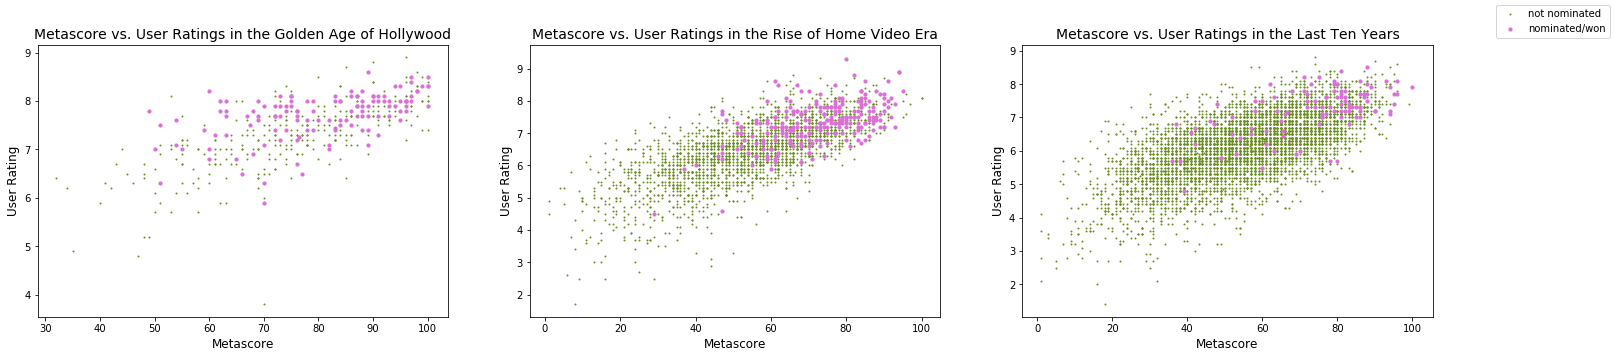

In [20]:
fig_cat, (ax_golden, ax_home, ax_now) = plt.subplots(1,3, figsize=[25,5])

# golden age
test_golden = merge_golden
lame_movies_golden = test_golden[test_golden['Winner'] == 0]
good_movies_golden = test_golden[test_golden['Winner'] != 0]
ax_golden.scatter(lame_movies_golden['metascore'], lame_movies_golden['avg_vote'], s=1, color='olivedrab')
ax_golden.scatter(good_movies_golden['metascore'], good_movies_golden['avg_vote'], s=10, color='orchid')
ax_golden.set_title('Metascore vs. User Ratings in the Golden Age of Hollywood', fontsize=14)
ax_golden.set_xlabel('Metascore', fontsize=12)
ax_golden.set_ylabel('User Rating', fontsize=12)

# rise of home videos
test_home = merge_home
lame_movies_home = test_home[test_home['Winner'] == 0]
good_movies_home = test_home[test_home['Winner'] != 0]
ax_home.scatter(lame_movies_home['metascore'], lame_movies_home['avg_vote'], s=1, color='olivedrab')
ax_home.scatter(good_movies_home['metascore'], good_movies_home['avg_vote'], s=10, color='orchid')
ax_home.set_title('Metascore vs. User Ratings in the Rise of Home Video Era', fontsize=14)
ax_home.set_xlabel('Metascore', fontsize=12)
ax_home.set_ylabel('User Rating', fontsize=12)

# last 5 years
test_now = merge_now
lame_movies_now = test_now[test_now['Winner'] == 0]
good_movies_now = test_now[test_now['Winner'] != 0]
ax_now.scatter(lame_movies_now['metascore'], lame_movies_now['avg_vote'], s=1, color='olivedrab')
ax_now.scatter(good_movies_now['metascore'], good_movies_now['avg_vote'], s=10, color='orchid')
ax_now.set_title('Metascore vs. User Ratings in the Last Ten Years', fontsize=14)
ax_now.set_xlabel('Metascore', fontsize=12)
ax_now.set_ylabel('User Rating', fontsize=12)

fig_cat.legend(['not nominated', 'nominated/won'], loc='upper right')

These scatterplots display a general trend that most movies that are nominated and/or win awards are both highly rated by critics as well as users or IMDb

## Number of Movies Nominated Per Year

([<matplotlib.axis.XTick at 0x7f70765140b8>,
 <a list of 9 Text xticklabel objects>)

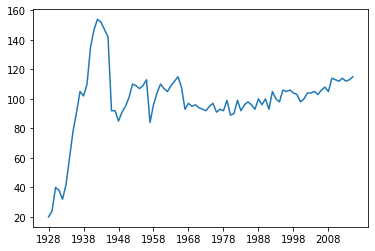

In [21]:
award = pd.read_csv('oscars.csv')
award_grouped = award.groupby('Year').nunique()
xaxis = [int(x[-4:]) for x in list(award_grouped.index)]
plt.plot(xaxis, award_grouped['Film'])
plt.xticks(np.arange(min(xaxis), max(xaxis)+1, 10.0))

The chart shows that the number of movies that are nominated each year reached a peak in the 1940s, and has since leveled out. We were hoping to find data that showed that less movies are nominated in recent years, meaning that few movies dominate all the awards. We were surpised to see that this has not been the general trend. While less movies are nominated now than in the mid 1900s, there seems to be a slight increase in nominated movies after 2008, highlighting that more movies are being recognized for their work - which is a good thing.

## Number of Oscar Winners Per Year

([<matplotlib.axis.XTick at 0x7f7076da6550>,
 <a list of 9 Text xticklabel objects>)

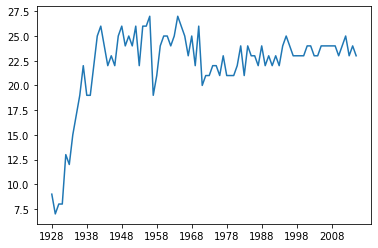

In [24]:
award2 = award[award['Winner'] == 1].groupby('Year').nunique()
xaxis2 = [int(x[-4:]) for x in list(award2.index)]
plt.plot(xaxis2, award2['Film'])
plt.xticks(np.arange(min(xaxis2), max(xaxis2)+1, 10.0))

The chart highlights that the number of oscar winners per year has increased since the early 30s (which is expected), and leveled out. 